# Standford dogs dataset

In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import re
from keras.utils import to_categorical
from skimage import transform

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [14]:
images_dir = "../datasets/stanford-dogs-dataset/images"

In [49]:
os.listdir(os.path.join(images_dir, os.listdir(images_dir)[0]))

['n02097658_26.jpg',
 'n02097658_4869.jpg',
 'n02097658_595.jpg',
 'n02097658_9222.jpg',
 'n02097658_422.jpg',
 'n02097658_1326.jpg',
 'n02097658_7970.jpg',
 'n02097658_10567.jpg',
 'n02097658_1469.jpg',
 'n02097658_1086.jpg',
 'n02097658_1910.jpg',
 'n02097658_5223.jpg',
 'n02097658_2766.jpg',
 'n02097658_3693.jpg',
 'n02097658_10997.jpg',
 'n02097658_10559.jpg',
 'n02097658_11242.jpg',
 'n02097658_3484.jpg',
 'n02097658_7619.jpg',
 'n02097658_4890.jpg',
 'n02097658_1917.jpg',
 'n02097658_4728.jpg',
 'n02097658_1693.jpg',
 'n02097658_2173.jpg',
 'n02097658_11118.jpg',
 'n02097658_6300.jpg',
 'n02097658_633.jpg',
 'n02097658_141.jpg',
 'n02097658_1137.jpg',
 'n02097658_237.jpg',
 'n02097658_2012.jpg',
 'n02097658_6289.jpg',
 'n02097658_427.jpg',
 'n02097658_6672.jpg',
 'n02097658_1690.jpg',
 'n02097658_7785.jpg',
 'n02097658_816.jpg',
 'n02097658_2824.jpg',
 'n02097658_5420.jpg',
 'n02097658_552.jpg',
 'n02097658_7425.jpg',
 'n02097658_10854.jpg',
 'n02097658_6.jpg',
 'n02097658_4201.j

In [59]:
classes = []
images = []

for directory in os.listdir(images_dir):
    if directory != ".DS_Store":
        dog_class = "".join(directory.split("-")[1:])
        dog_class = re.sub(pattern=r'[_-]', repl=" ", string=dog_class)
        dog_class = dog_class.lower()

        for image in os.listdir(os.path.join(images_dir, directory)):
            images.append(os.path.join(images_dir, directory, image))
            classes.append(dog_class)

In [61]:
len(classes), len(images)

(20580, 20580)

In [67]:
data = pd.DataFrame()
data["image"] = [plt.imread(x) for x in images]
data["class"] = classes
data.head()

,image,class
0,"[[[213, 217, 226], [213, 217, 226], [213, 217,...",silky terrier
1,"[[[197, 251, 251], [197, 251, 251], [197, 251,...",silky terrier
2,"[[[166, 184, 198], [170, 188, 202], [182, 200,...",silky terrier
3,"[[[137, 127, 115], [138, 128, 116], [138, 129,...",silky terrier
4,"[[[88, 103, 20], [89, 104, 21], [90, 105, 22],...",silky terrier


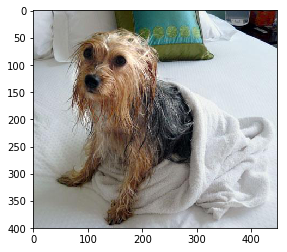

In [69]:
plt.imshow(data["image"][0])

In [72]:
max_width = 0
max_height = 0

min_width = 99999
min_height = 99999

for image in data["image"]:
    if image.shape[0] < min_height:
        min_height = image.shape[0]
    if image.shape[1] < min_width:
        min_width = image.shape[1]
    if image.shape[0] > max_height:
        max_height = image.shape[0]
    if image.shape[1] > max_width:
        max_width = image.shape[1]
        
print("Max dimension: {}x{}".format(max_height, max_width))
print("Min dimension: {}x{}".format(min_height, min_width))

Max dimension: 2562x3264
Min dimension: 100x97


In [73]:
x_data = np.array(data["image"])
target = np.array(data["class"])

x_data.shape, target.shape

((20580,), (20580,))

In [ ]:
x_data = [transform.resize(image=x, output_shape=(100, 100)) for x in x_data]

In [ ]:
x_data[0].shape

In [ ]:
plt.imshow(x_data[0])